<h1 style="color:blue;">Group 4 Final Project</h1>


https://mesonet.agron.iastate.edu/request/download.phtml?network=NJ_ASOS

<font size="5">Members:</font> <br> Birendra Khimding <br> Muzhgan Rustaqi <br> Andrew Fennimore

In [172]:
import pandas as pd

# Read Data from the MJX
url = "https://raw.githubusercontent.com/Fenn3963/Weather-Impact-on-Air-Traffic-Management/refs/heads/main/MJX.csv"

#All values with na are labeled as M
weather = pd.read_csv(url , na_values= "M")

<h3 style="color:blue;"><u>Cleaning and Describing Data</u></h3>

In [201]:
from IPython.display import display, HTML

# Create a temporary DataFrame removing unnecessary files
"""
remove station: All values are the same MJX
remove valid: date not necessary for analysis
remove metar: only a form number
remove peak_wind_time: date not necessary for analysis
"""
temp_weather = weather.drop(columns=["station", "valid", "metar", "peak_wind_time"])

#################################################################################################

# Column descriptions dictionary
column_descriptions = {
    "station": "Three or four character site identifier",
    "valid": "Timestamp of the observation",
    "tmpf": "Air Temperature in Fahrenheit, typically @ 2 meters",
    "dwpf": "Dew Point Temperature in Fahrenheit, typically @ 2 meters",
    "relh": "Relative Humidity in %",
    "drct": "Wind Direction in degrees from *true* north",
    "sknt": "Wind Speed in knots",
    "p01i": "One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset. This varies slightly by site. Values are in inches. This value may or may not contain frozen precipitation melted by some device on the sensor or estimated by some other means. Unfortunately, we do not know of an authoritative database denoting which station has which sensor.",
    "alti": "Pressure altimeter in inches",
    "mslp": "Sea Level Pressure in millibar",
    "vsby": "Visibility in miles",
    "gust": "Wind Gust in knots",
    "skyc1": "Sky Level 1 Coverage",
    "skyc2": "Sky Level 2 Coverage",
    "skyc3": "Sky Level 3 Coverage",
    "skyc4": "Sky Level 4 Coverage",
    "skyl1": "Sky Level 1 Altitude in feet",
    "skyl2": "Sky Level 2 Altitude in feet",
    "skyl3": "Sky Level 3 Altitude in feet",
    "skyl4": "Sky Level 4 Altitude in feet",
    "wxcodes": "Present Weather Codes (space separated)",
    "feel": "Apparent Temperature (Wind Chill or Heat Index) in Fahrenheit",
    "ice_accretion_1hr": "Ice Accretion over 1 Hour (inches)",
    "ice_accretion_3hr": "Ice Accretion over 3 Hours (inches)",
    "ice_accretion_6hr": "Ice Accretion over 6 Hours (inches)",
    "peak_wind_gust": "Peak Wind Gust (from PK WND METAR remark) (knots)",
    "peak_wind_drct": "Peak Wind Gust Direction (from PK WND METAR remark) (deg)",
    "peak_wind_time": "Peak Wind Gust Time (from PK WND METAR remark)",
    "metar": "Unprocessed reported observation in METAR format"
}

#################################################################################################
# Split up the quantitative and qualitative data
quant = temp_weather.select_dtypes(include=["number"])
qual = temp_weather.select_dtypes(exclude=["number"])

# create dictionary of the statsistical information and descriptions
stats_dict = {}

#################################################################################################

# Quantitative stats
for col in quant.columns:
    mode_values = quant[col].mode().dropna().tolist()
    if mode_values:
        mode = mode_values
    else:
        mode = None
    
    # Calculate stats and give description
    count = quant[col].count()
    mean = round(quant[col].mean(), 2)
    median = round(quant[col].median(), 2)
    std = round(quant[col].std(), 2)
    data_type = "Quantitative"
    description = column_descriptions.get(col)
    
    # Find the percentage of null values
    null_percentage = round((quant[col].isnull().sum() / len(quant[col])) * 100, 2) #find percentage of values with "none"

    # Create stats dictionary
    stats = {
        "Description": description,
        "Data Type": data_type,
        "Count": count,
        "Mean": mean,
        "Median": median,
        "Std": std,
        "Mode": mode,
        "Null Percentage": f"{null_percentage}%"  #% that doesn't have values
    }
    
    # Filter out None values and store in stats_dict
    stats_filtered = {}
    for k, v in stats.items():
        if v is not None:
            stats_filtered[k] = v

    stats_dict[col] = stats_filtered
    
#################################################################################################

# Qualitative stats
for col in qual.columns:
    mode_values = qual[col].mode().dropna().tolist()
    
    # If every value is unique, set mode to None
    if len(mode_values) == len(qual[col].dropna().unique()):
        mode_output = None
    else:
        if mode_values:
            mode_output = mode_values
        else:
            mode_output = None

    # Get the most frequent count 
    if mode_output is not None:
        most_frequent_count = qual[col].value_counts().iloc[0]
    else:
        most_frequent_count = None
    
    # Calculate stats and description
    count = qual[col].count()
    unique_values = qual[col].nunique()
    data_type = "Qualitative"
    description = column_descriptions.get(col, "No description available")
    
    # Calculate the percentage of null values
    null_percentage = round((qual[col].isnull().sum() / len(qual[col])) * 100, 2) #find percentage of values with "none"

    # Create stats dictionary
    stats = {
        "Description": description,
        "Data Type": data_type,
        "Count": count,
        "Mode": mode_output,
        "Unique Values": unique_values,
        "Most Frequent Count": most_frequent_count,
        "Null Percentage": f"{null_percentage}%"
    }
    
    # Filter out None values and store in stats_dict
    stats_filtered = {}
    for k, v in stats.items():
        if v is not None:
            stats_filtered[k] = v
    stats_dict[col] = stats_filtered  

#################################################################################################

# Print the statistics and description
html_code = '<p style="font-size:20px; color:green;">Description of columns:</p>'
display(HTML(html_code))

for col, stats in stats_dict.items():
    print(f"\nStatistics for '{col}':")
    for key, value in stats.items():
        print(f"  {key}: {value}")


Statistics for 'tmpf':
  Description: Air Temperature in Fahrenheit, typically @ 2 meters
  Data Type: Quantitative
  Count: 11418
  Mean: 54.56
  Median: 54.0
  Std: 18.48
  Mode: [59.0]
  Null Percentage: 0.04%

Statistics for 'dwpf':
  Description: Dew Point Temperature in Fahrenheit, typically @ 2 meters
  Data Type: Quantitative
  Count: 11416
  Mean: 45.75
  Median: 48.0
  Std: 18.53
  Mode: [59.0]
  Null Percentage: 0.06%

Statistics for 'relh':
  Description: Relative Humidity in %
  Data Type: Quantitative
  Count: 11416
  Mean: 75.4
  Median: 80.83
  Std: 20.79
  Mode: [100.0]
  Null Percentage: 0.06%

Statistics for 'drct':
  Description: Wind Direction in degrees from *true* north
  Data Type: Quantitative
  Count: 11141
  Mean: 162.4
  Median: 180.0
  Std: 122.03
  Mode: [0.0]
  Null Percentage: 2.47%

Statistics for 'sknt':
  Description: Wind Speed in knots
  Data Type: Quantitative
  Count: 11415
  Mean: 6.03
  Median: 6.0
  Std: 4.7
  Mode: [0.0]
  Null Percentage: 0.

Initial thoughts:<br>After looking closer at the columns, some should very clearly not be used for analysis. Skyl4, ice_accretion_1hr, ice_accretion_3hr, ice_accretion_6hr, and snowdepth all have no values for analysis and can be removed. There are also a lot of null values for some of the columns, and should be dealt with careful to preserve data integrity. 

In [133]:
# Number of Missing vlaues in the dataframe
weather.isna().sum()

station                  0
valid                    0
tmpf                     5
dwpf                     7
relh                     7
drct                   282
sknt                     8
p01i                     3
alti                   111
mslp                  2495
vsby                     1
gust                  9568
skyc1                   30
skyc2                 9246
skyc3                10618
skyc4                11423
skyl1                 4939
skyl2                 9246
skyl3                10618
skyl4                11423
wxcodes               9072
ice_accretion_1hr    11423
ice_accretion_3hr    11423
ice_accretion_6hr    11423
peak_wind_gust       10971
peak_wind_drct       10971
peak_wind_time       10971
feel                     9
metar                    0
snowdepth            11423
dtype: int64

In [134]:
# Setting a threshold to remove any column with more then 15% missing value
threshold = len(weather)*.15
cols_drop_nan = weather.columns[weather.isna().sum() <= threshold]

# Drop row with missing values
weather.dropna(subset=cols_drop_nan, inplace=True)
weather.isna().sum()

station                  0
valid                    0
tmpf                     0
dwpf                     0
relh                     0
drct                     0
sknt                     0
p01i                     0
alti                     0
mslp                  2305
vsby                     0
gust                  9208
skyc1                    0
skyc2                 8907
skyc3                10235
skyc4                10996
skyl1                 4751
skyl2                 8907
skyl3                10235
skyl4                10996
wxcodes               8732
ice_accretion_1hr    10996
ice_accretion_3hr    10996
ice_accretion_6hr    10996
peak_wind_gust       10557
peak_wind_drct       10557
peak_wind_time       10557
feel                     0
metar                    0
snowdepth            10996
dtype: int64

In [135]:
# Droping columns with more then 15% missing values

cols_to_drop = weather.columns[weather.isna().sum() > 0]
print(cols_to_drop)
weather.drop(columns=cols_to_drop , inplace=True)
weather.isna().sum()

Index(['mslp', 'gust', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3',
       'skyl4', 'wxcodes', 'ice_accretion_1hr', 'ice_accretion_3hr',
       'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct',
       'peak_wind_time', 'snowdepth'],
      dtype='object')


station    0
valid      0
tmpf       0
dwpf       0
relh       0
drct       0
sknt       0
p01i       0
alti       0
vsby       0
skyc1      0
feel       0
metar      0
dtype: int64

In [136]:
# Renaming Column names 

weather.rename(columns={'valid': 'timestamp', 'tmpf': 'air_temperature','dwpf':'dew_temperature', 'relh':'humidity', 'drct':'wind_direction', 'sknt':'wind_speed', 'p01i':'one_hour_precp' , 'alti':'pressure_altimeter', 'vsby':'visibility', 'skyc1':'cloud_coverage', 'feel':'apparent_temp', 'metar':'unprocessed_observation'  } , inplace=True)
weather.columns

Index(['station', 'timestamp', 'air_temperature', 'dew_temperature',
       'humidity', 'wind_direction', 'wind_speed', 'one_hour_precp',
       'pressure_altimeter', 'visibility', 'cloud_coverage', 'apparent_temp',
       'unprocessed_observation'],
      dtype='object')

In [137]:
# Checking for the columns data type
weather.dtypes



station                     object
timestamp                   object
air_temperature            float64
dew_temperature            float64
humidity                   float64
wind_direction             float64
wind_speed                 float64
one_hour_precp              object
pressure_altimeter         float64
visibility                 float64
cloud_coverage              object
apparent_temp              float64
unprocessed_observation     object
dtype: object

In [138]:
#Replacing Char value to float 

weather['one_hour_precp'] = weather['one_hour_precp'].replace('T', '0.001')
print(weather['one_hour_precp'].unique())

['0.00' '0.02' '0.001' '0.01' '0.04' '0.07' '0.09' '0.03' '0.10' '0.17'
 '0.08' '0.06' '0.05' '0.14' '0.16' '0.11' '0.33' '0.29' '0.18' '0.12'
 '0.26' '0.15' '0.13' '0.27' '0.25' '0.36' '0.42' '0.19' '0.21' '0.35'
 '0.41' '0.45' '0.54' '0.57' '0.58' '0.32' '0.37' '0.38' '0.31' '0.46'
 '0.22' '0.20' '0.43' '0.23' '0.40']


In [139]:
weather.dtypes

station                     object
timestamp                   object
air_temperature            float64
dew_temperature            float64
humidity                   float64
wind_direction             float64
wind_speed                 float64
one_hour_precp              object
pressure_altimeter         float64
visibility                 float64
cloud_coverage              object
apparent_temp              float64
unprocessed_observation     object
dtype: object

In [140]:
#Changing the one_hour_precp column data type to float
weather['one_hour_precp'] = weather['one_hour_precp'].astype(float)

In [141]:
# Checking for number of 0.0 vlueas in the dataframe
col_with_zeor = (weather == 0.0).sum()
print(col_with_zeor)

station                       0
timestamp                     0
air_temperature               1
dew_temperature              17
humidity                      0
wind_direction             2413
wind_speed                 2413
one_hour_precp             9015
pressure_altimeter            0
visibility                    0
cloud_coverage                0
apparent_temp                 1
unprocessed_observation       0
dtype: int64


In [142]:
# Catagorical Columns
weather.value_counts('cloud_coverage')

cloud_coverage
CLR    4751
OVC    2426
BKN    1574
FEW    1177
SCT    1056
VV       12
Name: count, dtype: int64

In [203]:
# Numerical Columns
round(weather.describe(),2)


tmpf      dwpf      relh      drct      sknt      alti     mslp  \
count  11418.00  11416.00  11416.00  11141.00  11415.00  11312.00  8928.00   
mean      54.56     45.75     75.40    162.40      6.03     30.02  1017.29   
std       18.48     18.53     20.79    122.03      4.70      0.23     7.89   
min       -2.00     -6.00     15.73      0.00      0.00     29.26   991.30   
25%       41.00     32.00     59.18     30.00      3.00     29.88  1012.50   
50%       54.00     48.00     80.83    180.00      6.00     30.01  1017.00   
75%       69.80     60.00     93.45    280.00      9.00     30.16  1022.00   
max      100.00     80.60    100.00    360.00     30.00     30.96  1048.80   

           vsby     gust  skyc4  ...     skyl2     skyl3  skyl4  \
count  11422.00  1855.00    0.0  ...   2177.00    805.00    0.0   
mean       8.91    20.27    NaN  ...   4528.20   5730.93    NaN   
std        2.59     4.62    NaN  ...   2911.25   2714.98    NaN   
min        0.25    14.00    NaN  ...    500.00   1000.00    NaN   
25%       10.00    17.00    NaN  ...   2200.00   3600.00    NaN   
50%       10.00    19.00    NaN  ...   3700.00   5000.00    NaN   
75%       10.00    23.00    NaN  ...   6000.00   7500.00    NaN   
max       10.00    40.00    NaN  ...  12000.00  12000.00    NaN   

       ice_accretion_1hr  ice_accretion_3hr  ice_accretion_6hr  \
count                0.0                0.0                0.0   
mean                 NaN                NaN                NaN   
std                  NaN                NaN                NaN   
min                  NaN                NaN                NaN   
25%                  NaN                NaN                NaN   
50%                  NaN                NaN                NaN   
75%                  NaN                NaN                NaN   
max                  NaN                NaN                NaN   

       peak_wind_gust  peak_wind_drct      feel  snowdepth  
count          452.00          452.00  11414.00        0.0  
mean            29.56          267.57     53.09        NaN  
std              3.47           54.72     21.33        NaN  
min             26.00           30.00     -6.75        NaN  
25%             27.00          260.00     36.97        NaN  
50%             29.00          290.00     54.00        NaN  
75%             31.25          300.00     69.80        NaN  
max             42.00          340.00    114.20        NaN  

[8 rows x 21 columns]

Univariate EDA (Single Variable Analysis)

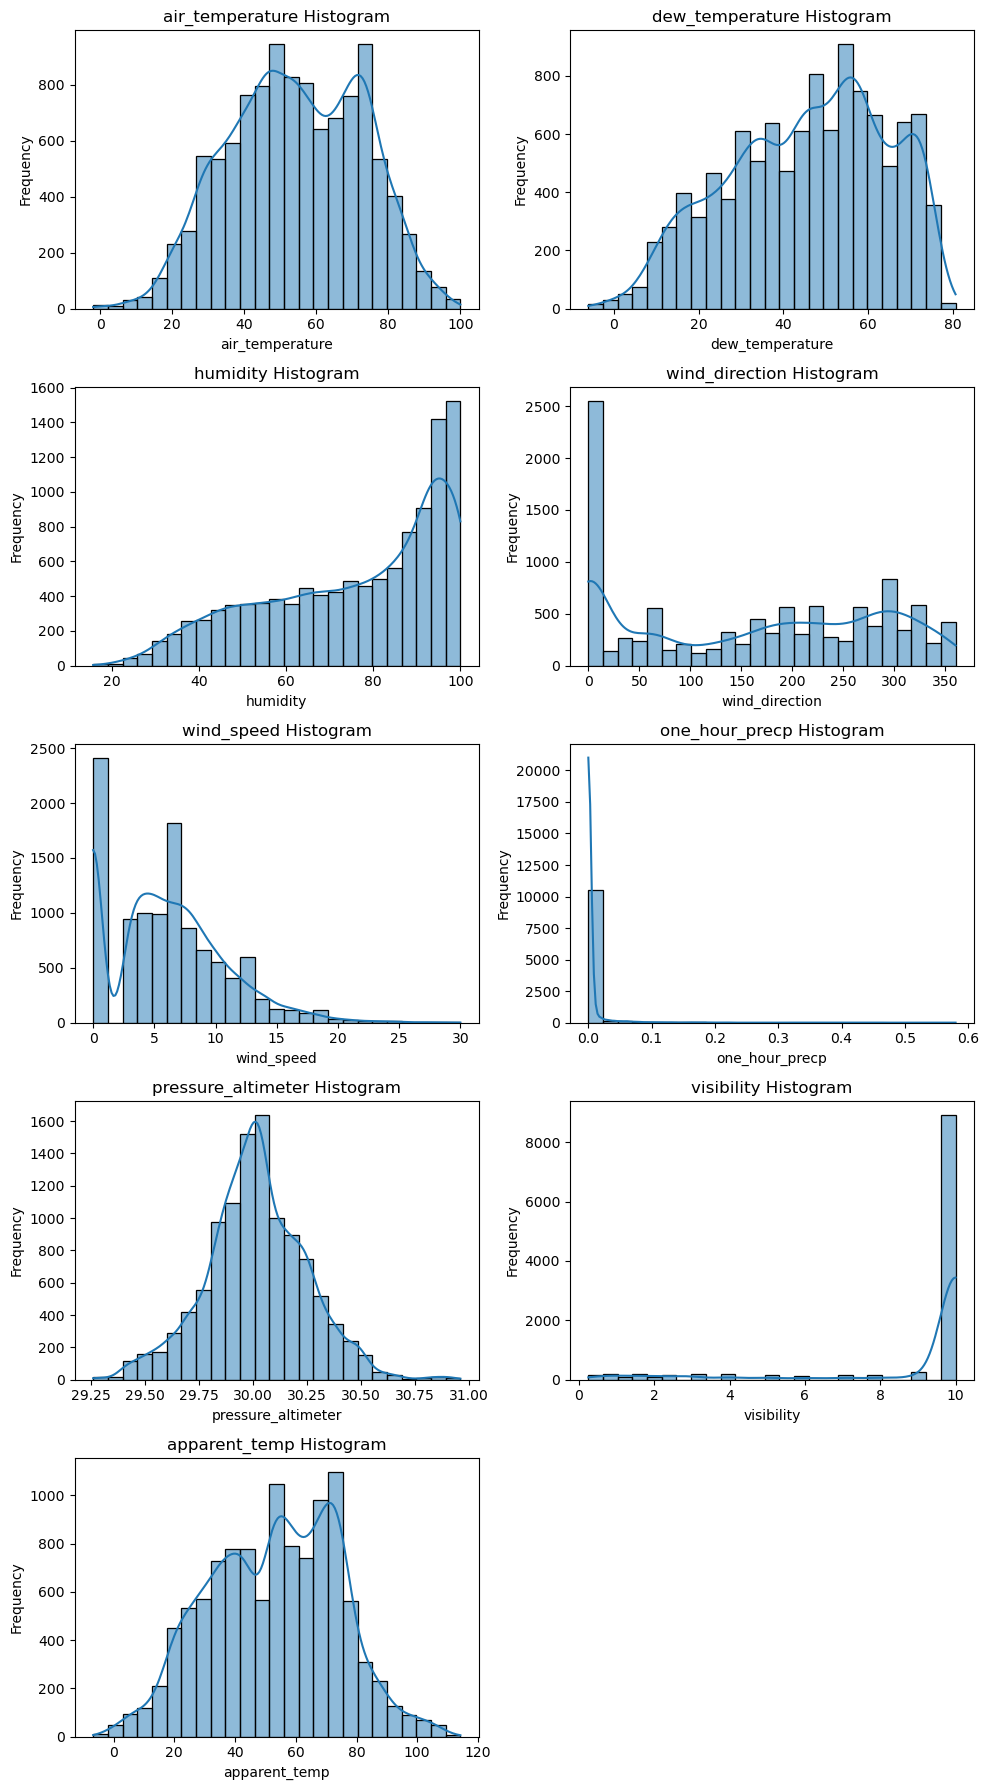

In [145]:
# Univariate EDA (Single Variable Analysis)

# Histogram for all the Numerical Column
import seaborn as sns 
import matplotlib.pyplot as plt 

columns_to_plot = ['air_temperature', 'dew_temperature', 'humidity','wind_direction' ,'wind_speed', 'one_hour_precp', 'pressure_altimeter', 'visibility', 'apparent_temp']

fig, axes = plt.subplots(5, 2, figsize=(10, 18)) 
axes = axes.flatten()
for i, col in enumerate(columns_to_plot):
    sns.histplot(weather[col], kde=True, ax=axes[i], bins=25)  # kde=True adds a density curve
    axes[i].set_title(f'{col} Histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

if len(columns_to_plot) < len(axes):
    axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

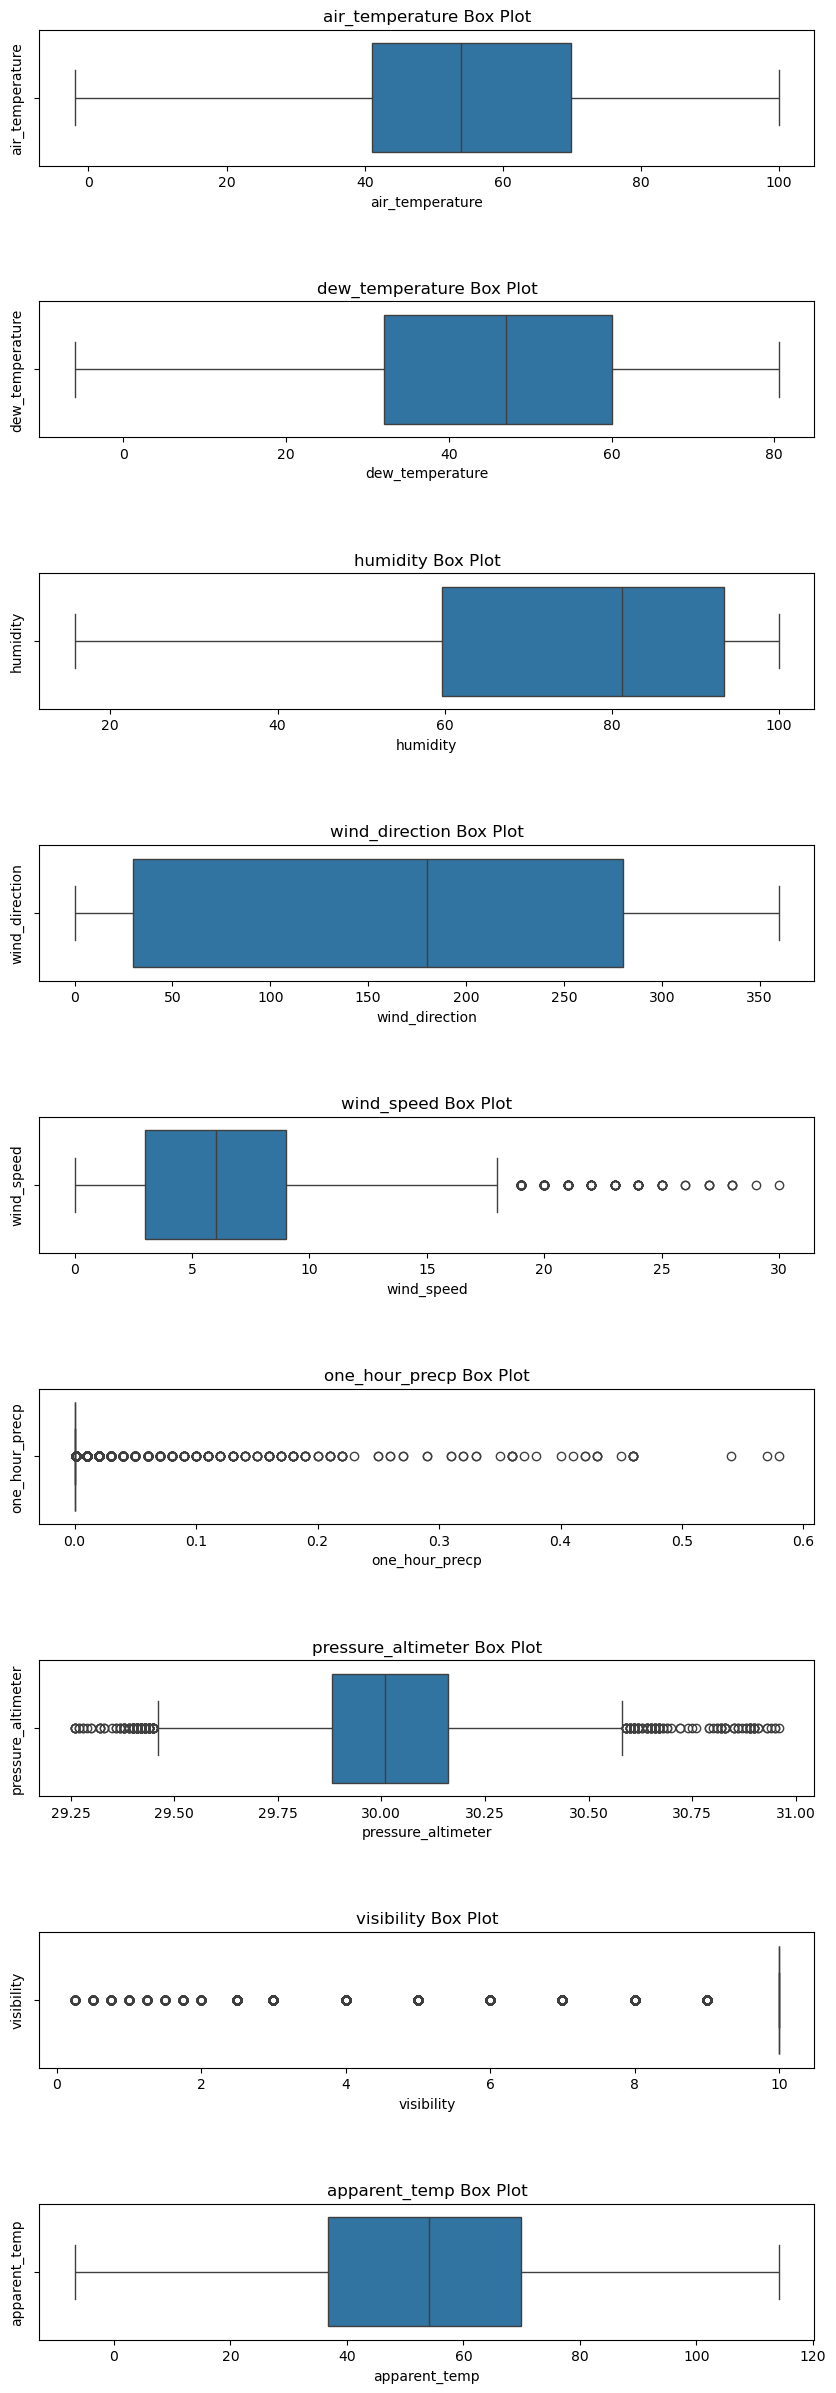

In [146]:
# Box plot for all the numerical columns

fig, axes = plt.subplots(9, 1, figsize=(10, 30))  
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    if col in weather.columns:
        sns.boxplot(x=weather[col], ax=axes[i])  # Box plot for each variable
        axes[i].set_title(f'{col} Box Plot')
        axes[i].set_ylabel(col)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Hide the last unused subplot if necessary
if len(columns_to_plot) < len(axes):
    axes[-1].set_visible(False)

plt.subplots_adjust(hspace=1)
plt.show()

Bivariate EDA (Two Variable Analysis)

In [148]:
#Bivariate EDA (Two Variable Analysis)

# Drop non-numeric columns
weather_numeric = weather.select_dtypes(include=['number'])

# The correlation matrix
correlation_matrix = weather_numeric.corr()
print(correlation_matrix)


                    air_temperature  dew_temperature  humidity  \
air_temperature            1.000000         0.890447 -0.120030   
dew_temperature            0.890447         1.000000  0.338121   
humidity                  -0.120030         0.338121  1.000000   
wind_direction            -0.009537        -0.179818 -0.384151   
wind_speed                 0.141349        -0.070859 -0.451061   
one_hour_precp             0.033981         0.106513  0.179136   
pressure_altimeter        -0.206105        -0.232368 -0.097974   
visibility                 0.069919        -0.099245 -0.415011   
apparent_temp              0.991233         0.899063 -0.082040   

                    wind_direction  wind_speed  one_hour_precp  \
air_temperature          -0.009537    0.141349        0.033981   
dew_temperature          -0.179818   -0.070859        0.106513   
humidity                 -0.384151   -0.451061        0.179136   
wind_direction            1.000000    0.537965       -0.017751   
wind_spee

In [149]:
# Cloud_coverage and Visibility
visibility_by_cloud = weather.groupby('cloud_coverage')['visibility'].mean()
print(visibility_by_cloud)

cloud_coverage
BKN    8.720775
CLR    9.762682
FEW    9.333050
OVC    7.067292
SCT    9.132102
VV     0.791667
Name: visibility, dtype: float64


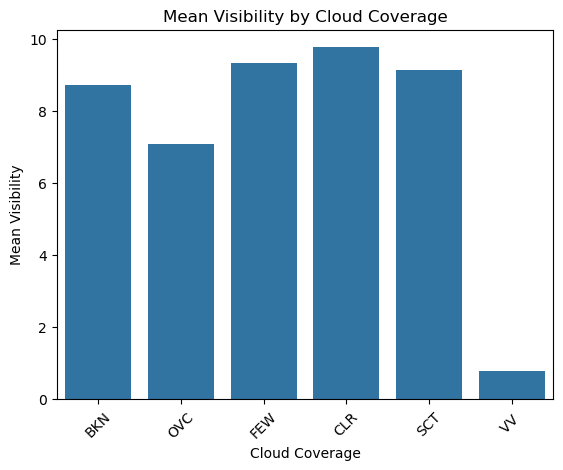

In [150]:

# Cloud_coverage and Visibility
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot to show the mean visibility by cloud coverage
sns.barplot(x='cloud_coverage', y='visibility', data=weather, estimator='mean', errorbar=None)

plt.title('Mean Visibility by Cloud Coverage')
plt.xlabel('Cloud Coverage')
plt.ylabel('Mean Visibility')
plt.xticks(rotation=45)  
plt.show()

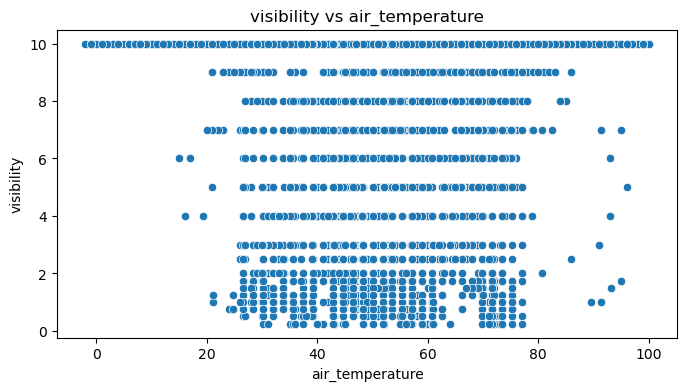

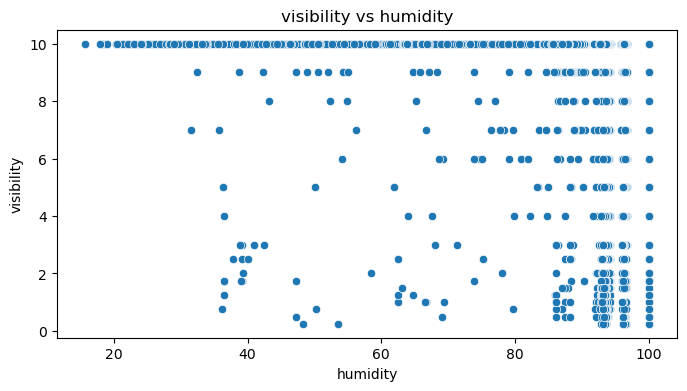

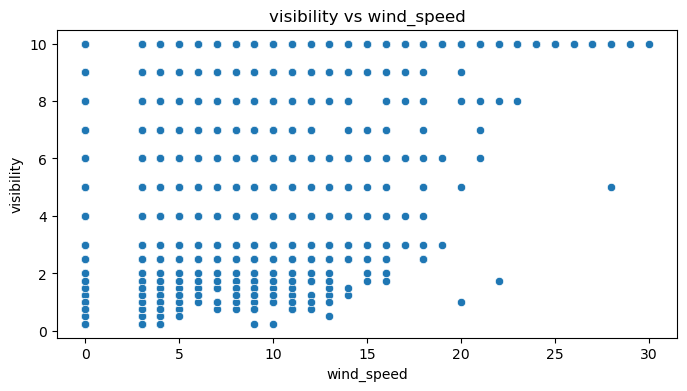

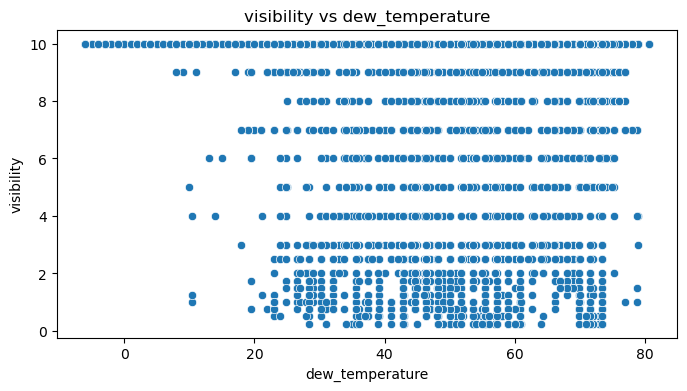

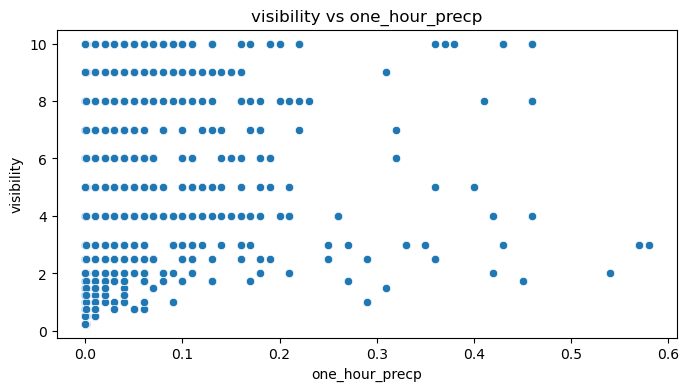

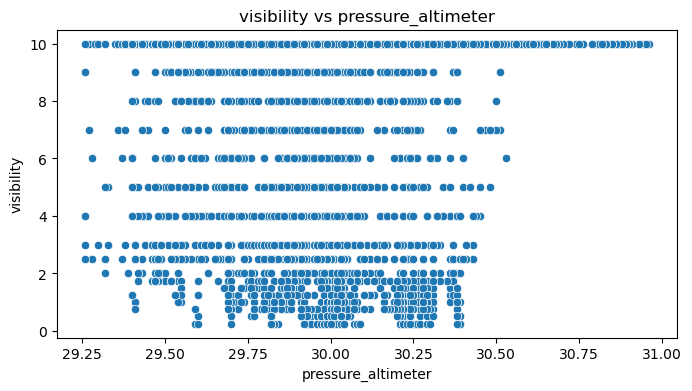

In [151]:

# Visibility with all other Numerical columns
pairs_to_plot = [
    ('air_temperature', 'visibility'),
    ('humidity', 'visibility'),
    ('wind_speed', 'visibility'),
    ('dew_temperature', 'visibility'),
    ('one_hour_precp', 'visibility'),
    ('pressure_altimeter', 'visibility')
]

# Create scatter plots for each pair
for col1, col2 in pairs_to_plot:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=weather[col1], y=weather[col2])
    plt.title(f'{col2} vs {col1}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()



Multivariate EDA (Multiple Variables Analysis)

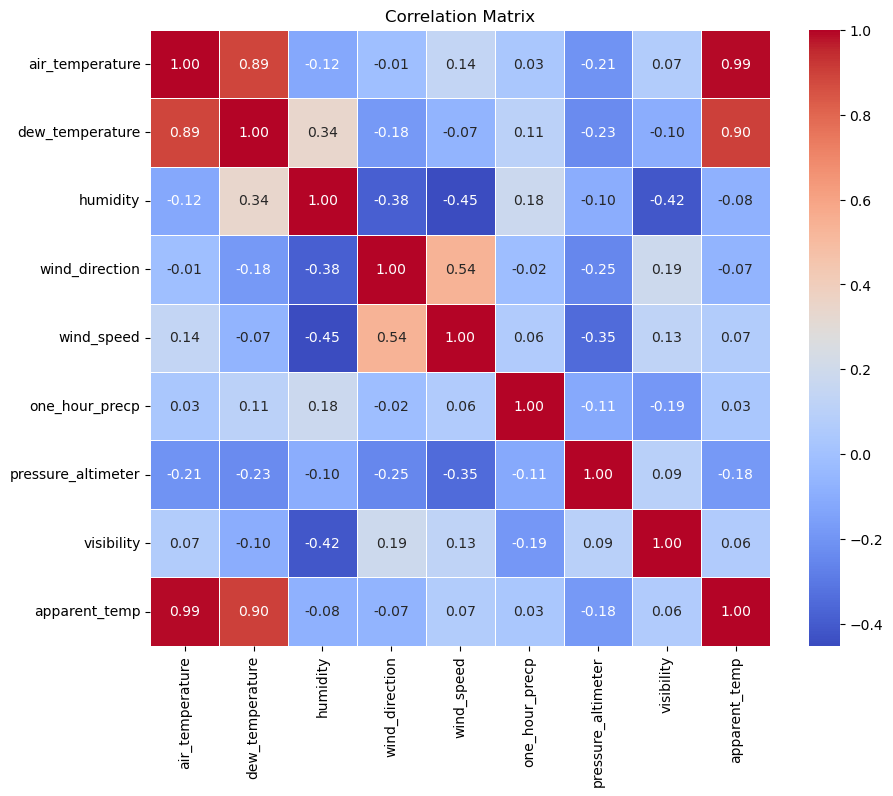

In [153]:
# Multivariate EDA (Multiple Variables Analysis)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<h3 style="color:blue;"><u>Inferential Statistics</u></h3>

<h3 style="color:red;">Hypothesis</h3>


#### Null Hypothesis (H₀):
The null hypothesis states that **climate indicators** do **not** have any significant impact on visibility. 
#### Alternative Hypothesis (H₁):
The alternative hypothesis suggests that **at least one** of the climate indicators **does** have a significant impact on visibility. 

#### Confidence Level
In this analysis, we will use a **95% confidence level** to assess the relationship between climate indicators and visibility. 
